<a href="https://colab.research.google.com/github/rht6226/BTP-DD/blob/main/Data_Visualisation_and_Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
def load_dataset():
    DIR = '/content/drive/MyDrive/Drowsiness Detection/Processed_Features/'
    train_df = pd.read_csv(DIR + 'train.csv')
    test_df = pd.read_csv(DIR + 'test.csv')

    y_train = train_df['Label'].values
    y_test = test_df['Label'].values

    X_train = train_df.drop(['Label'], axis=1).to_numpy()
    X_test = test_df.drop(['Label'], axis=1).to_numpy()

    print("X_train - {} , y_train - {}".format(X_train.shape, y_train.shape))
    print("X_test - {} , y_test - {}".format(X_test.shape, y_test.shape))

    return (X_train, y_train), (X_test, y_test)

In [3]:
(X_train, y_train), (X_test, y_test) = load_dataset()

X_train - (11856, 8) , y_train - (11856,)
X_test - (3135, 8) , y_test - (3135,)


# Data Visualization

In [4]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def pair_plot(Df, figSize=[16,16], dpi=100):
    mpl.rcParams['figure.dpi'] = dpi
    plt.rcParams['figure.figsize'] = figSize
    plt.close();
    sns.set_style("whitegrid");
    sns.pairplot(Df, hue="Label");
    plt.show()

In [5]:
import matplotlib.pyplot as plt

def box_plot(train_df, test_df, figSize=[16, 8], dpi=100, title='Unscaled Data'):
    # Set plot parameters
    mpl.rcParams['figure.dpi'] = 100
    plt.rcParams['figure.figsize'] = figSize
    fig, (ax1, ax2) = plt.subplots(1, 2)

    # Plot
    fig.suptitle('Box Plot -{}'.format(title))

    train_df.plot(kind='box', ax=ax1)
    ax1.set_title('Training Set')
    
    test_df.plot(kind='box', ax=ax2)
    ax2.set_title('Test Set')

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_kde(train_df, test_df, figSize=[16, 8], dpi=100, title='Unscaled Data'):
    # Set plot parameters
    mpl.rcParams['figure.dpi'] = 100
    plt.rcParams['figure.figsize'] = figSize
    fig, (ax1, ax2) = plt.subplots(1, 2)

    # Plot
    fig.suptitle('Kernel Density Estimate -{}'.format(title))

    train_df.plot(kind='kde', ax=ax1)
    ax1.set_title('Training Set')
    
    test_df.plot(kind='kde', ax=ax2)
    ax2.set_title('Test Set')

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def scale_data(X_train, X_test, scalar_type='minmax'):
    assert (scalar_type == 'minmax' or scalar_type == 'std')
    scaler = ''
    if scalar_type == 'minmax':
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()

    train_scaled = scaler.fit_transform(X_train)
    test_scaled = scaler.fit_transform(X_test)

    return train_scaled, test_scaled

In [8]:
def get_df(X, y):
    Df = pd.DataFrame(X, columns=['EAR', 'MAR', 'PUC', 'MOE', 'EAR_N', 'MAR_N', 'PUC_N', 'MOE_N'])
    Df['Label'] = y
    return Df

## Pairplot Visualisation

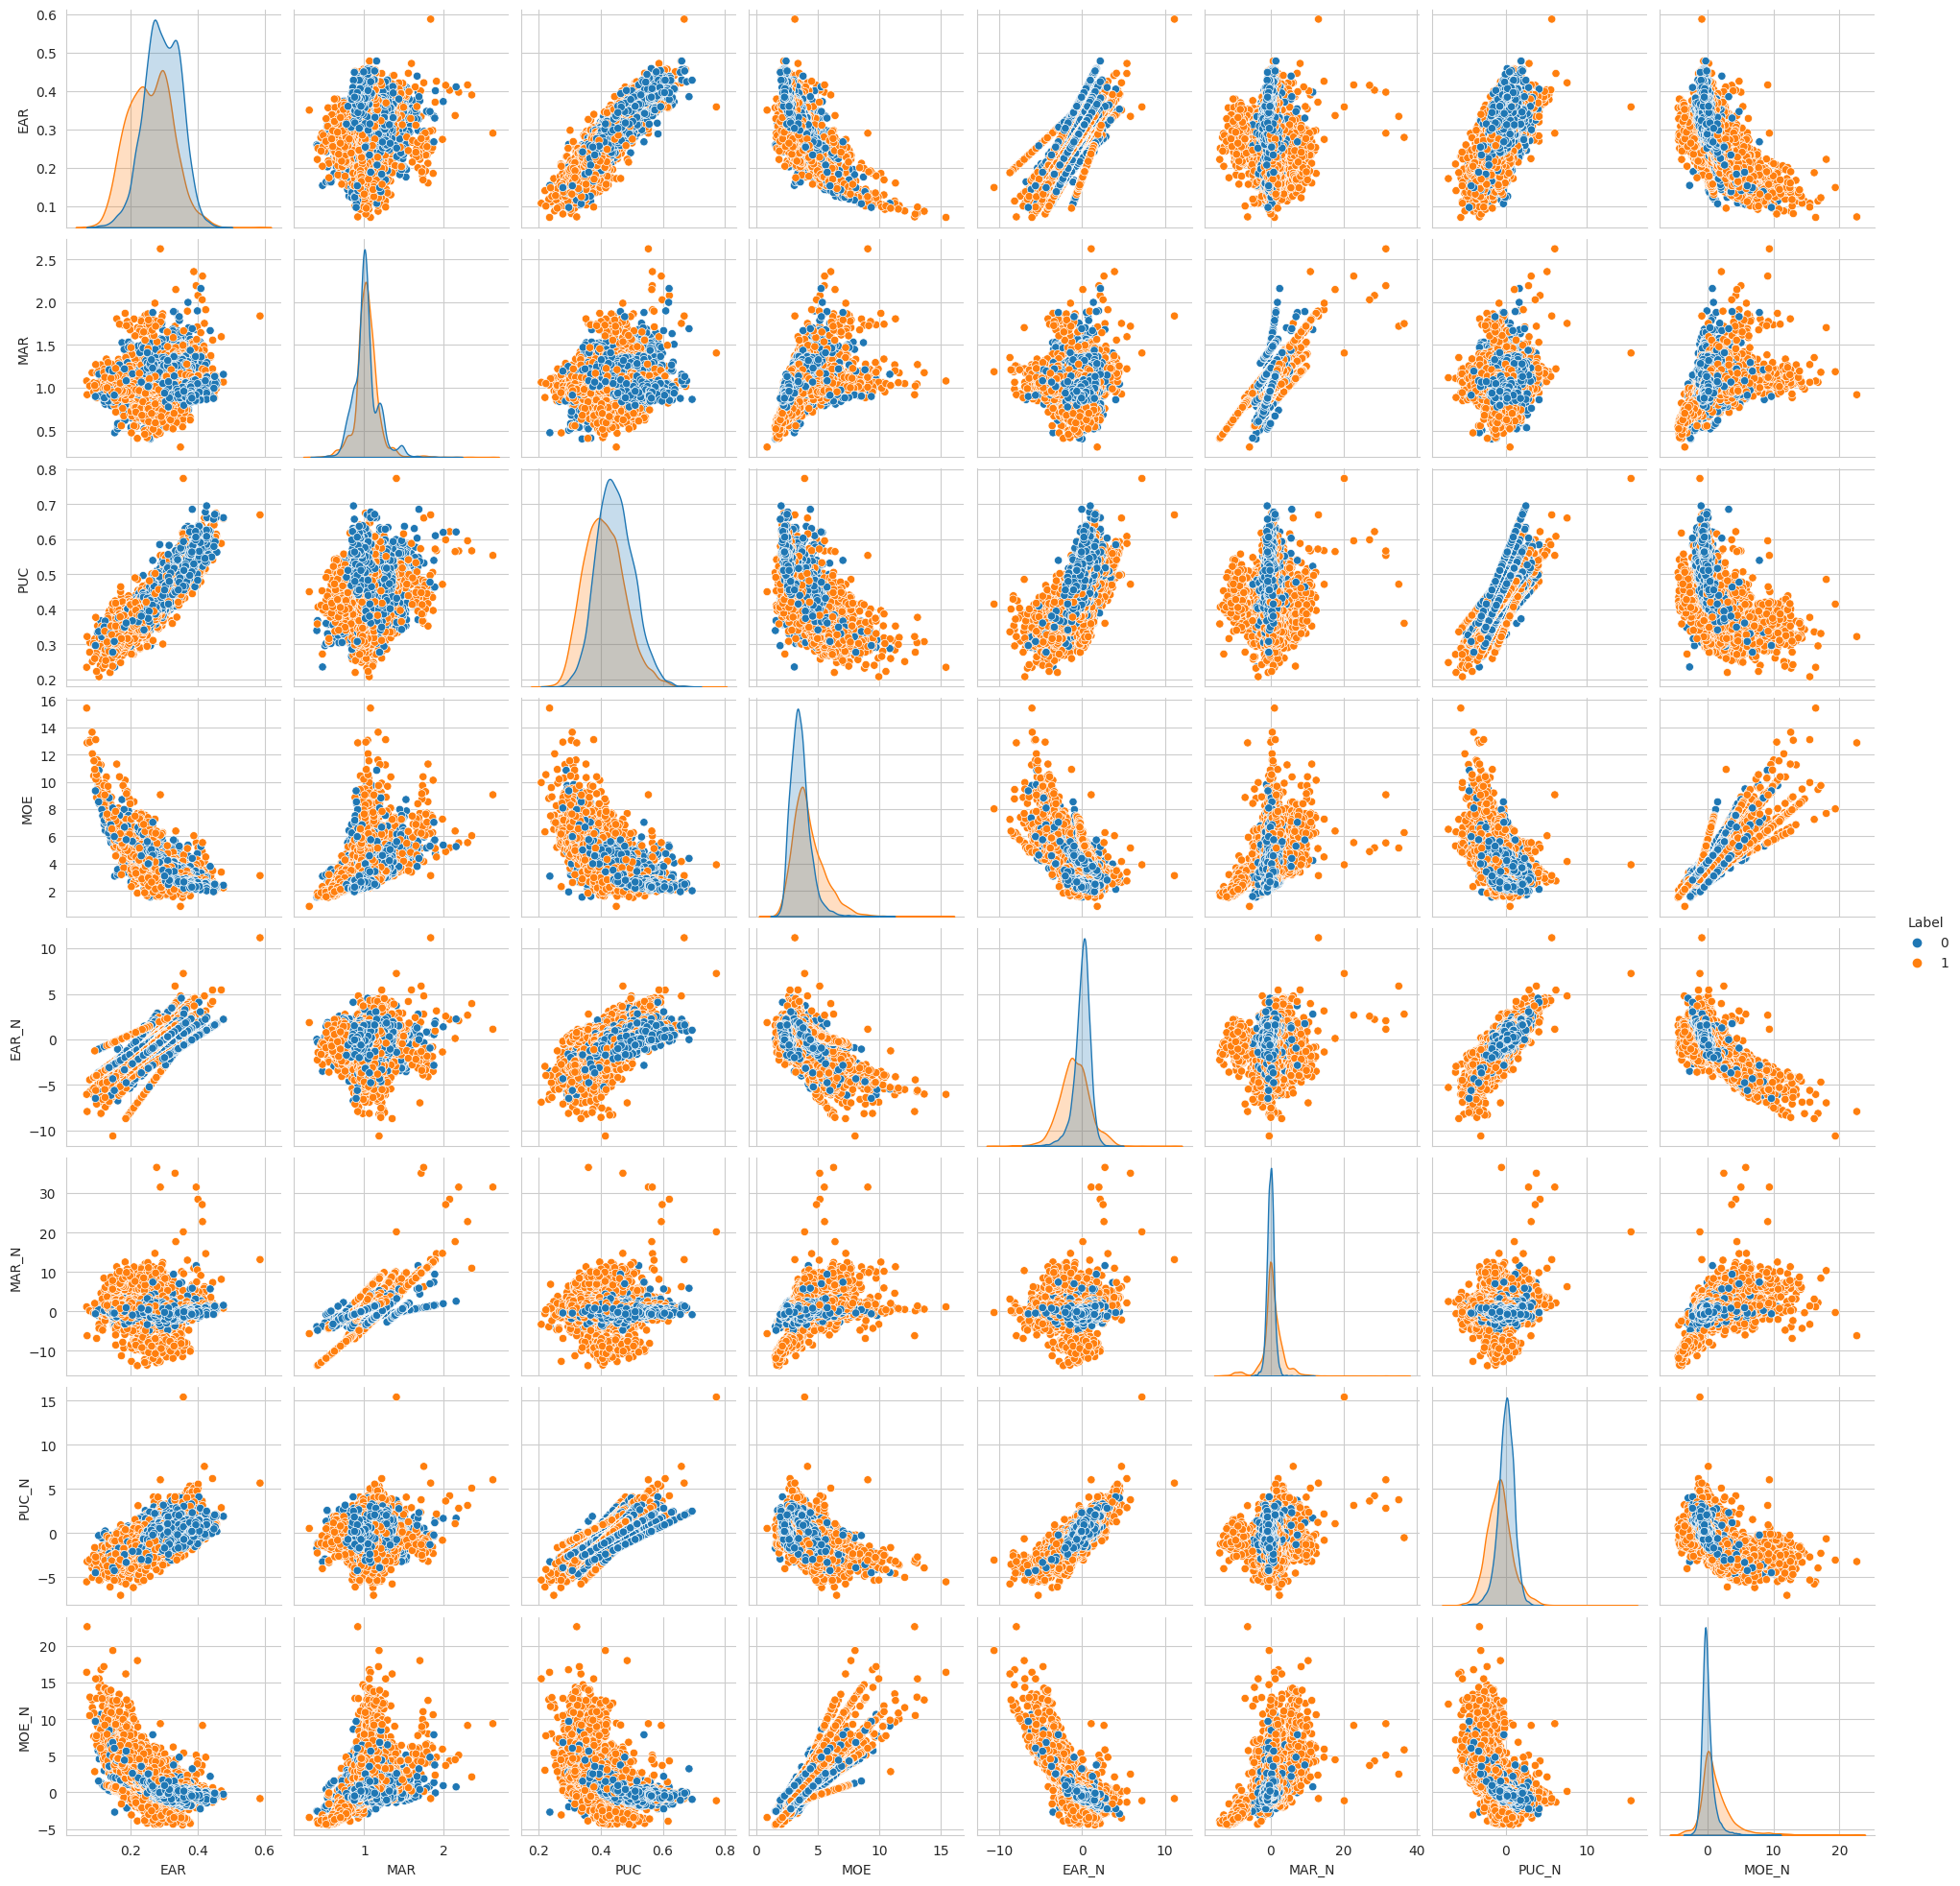

In [9]:
pair_plot(pd.concat([get_df(X_train, y_train), get_df(X_test, y_test)]))

# Data Scaling

## Unscaled Data

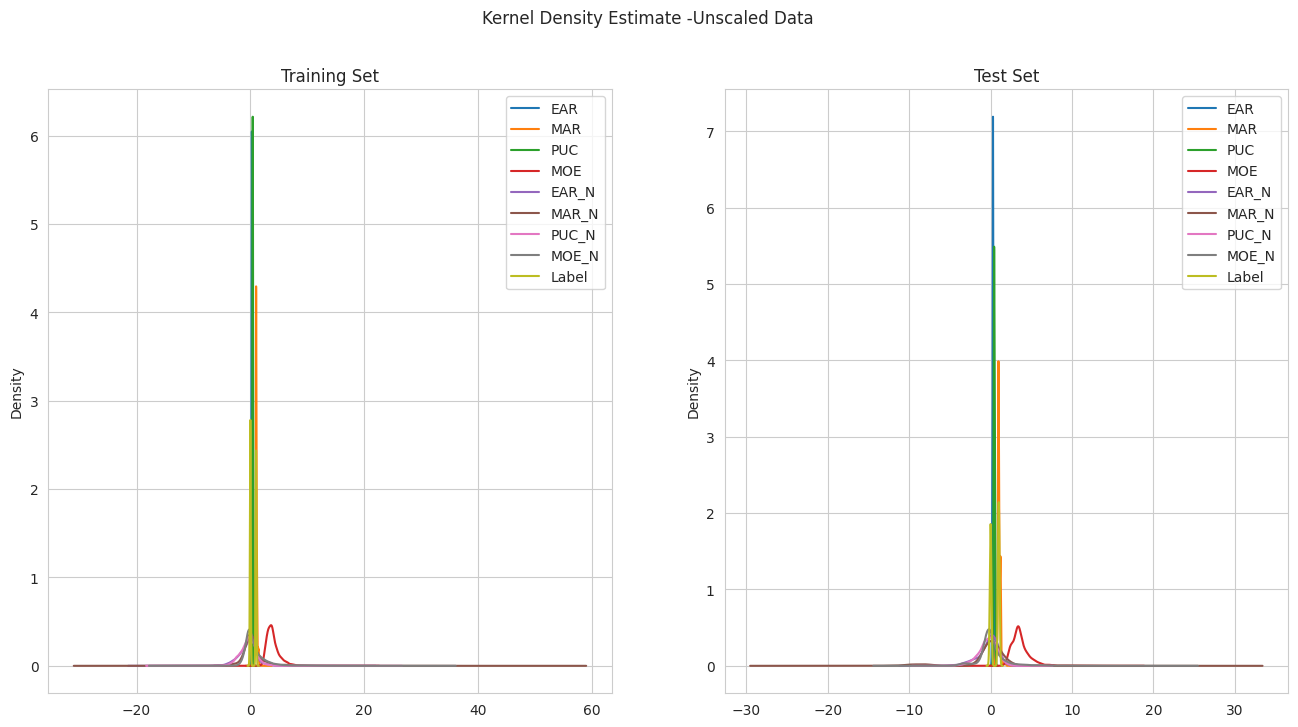

In [10]:
plot_kde(
    get_df(X_train, y_train),
    get_df(X_test, y_test)
    )

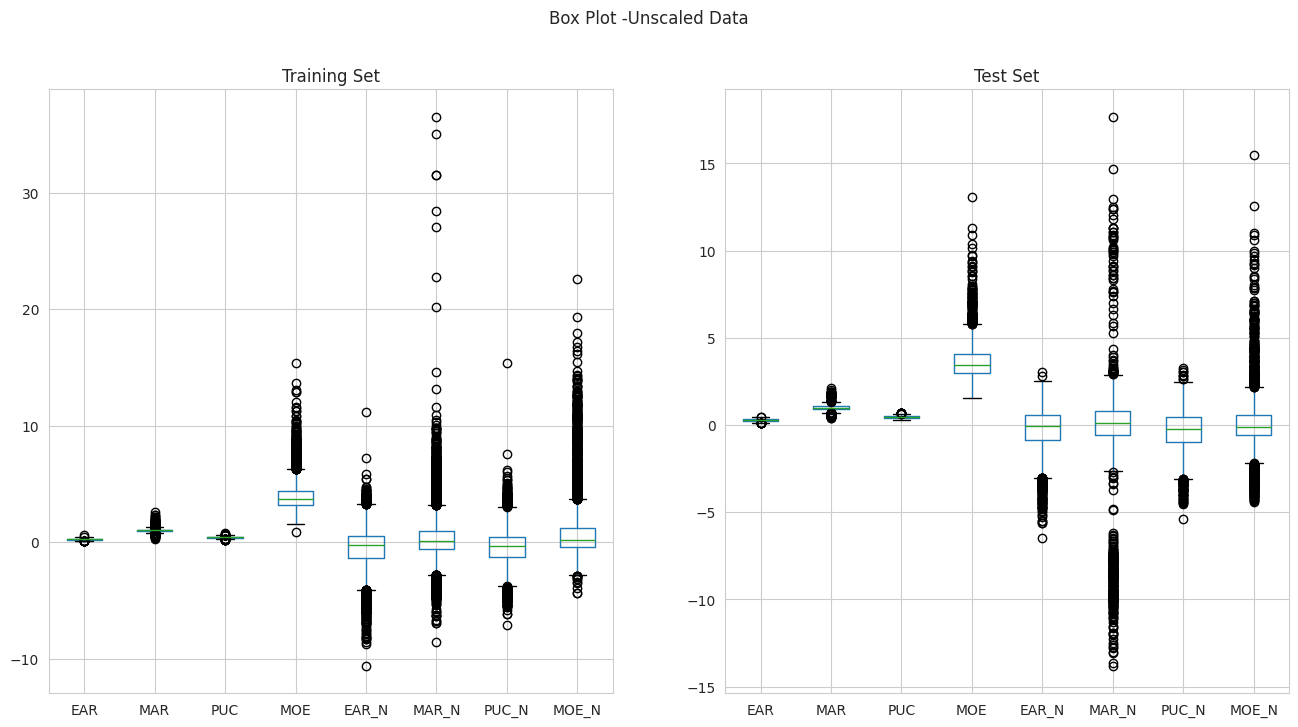

In [11]:
box_plot(get_df(X_train, y_train).drop(['Label'], axis=1), get_df(X_test, y_test).drop(['Label'], axis=1))

## MinMax Scaled Data

In [12]:
# MinMax-Scaled data
X_train_minmax, X_test_minmax = scale_data(X_train, X_test)

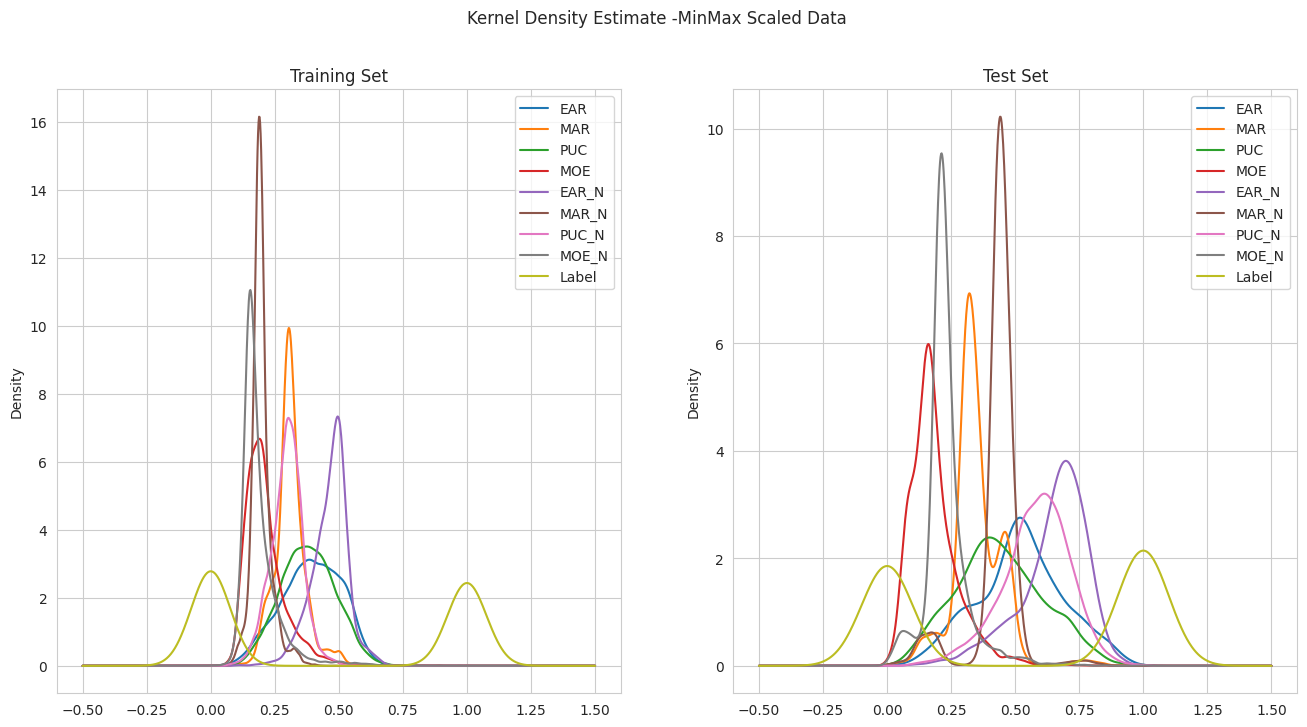

In [13]:
plot_kde(
    get_df(X_train_minmax, y_train),
    get_df(X_test_minmax, y_test),
    title='MinMax Scaled Data'
    )

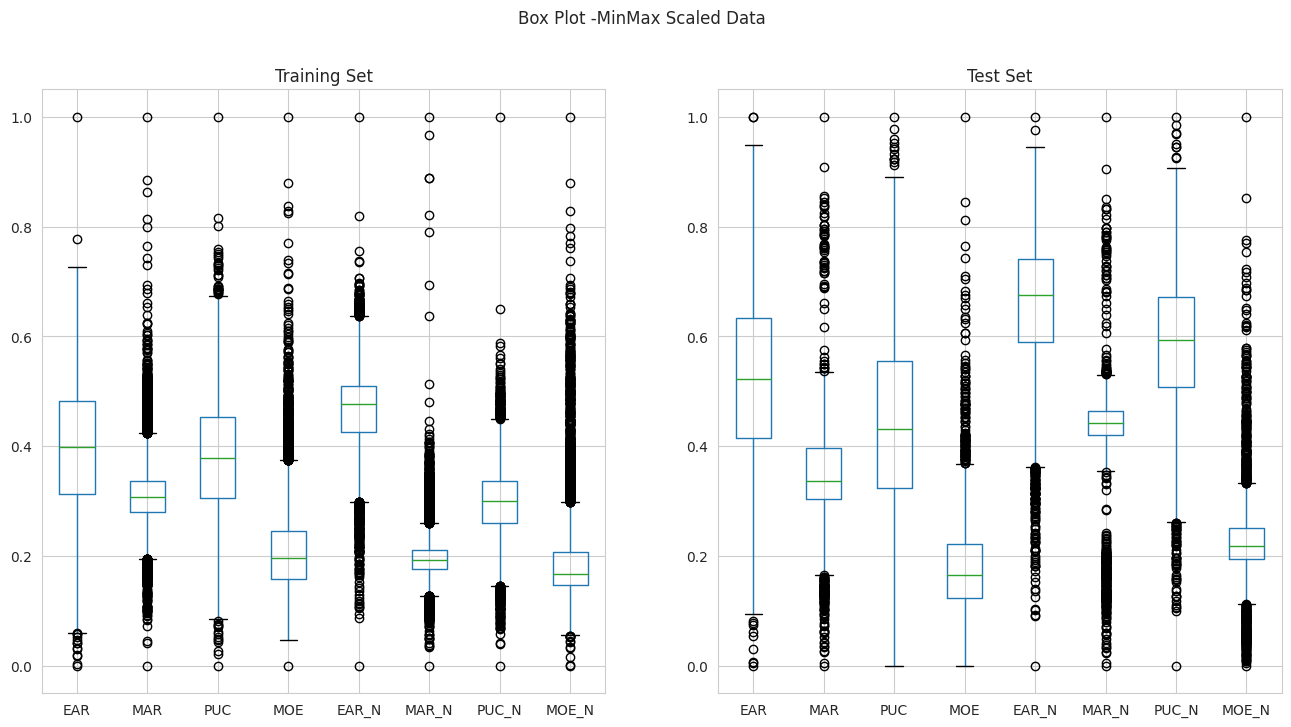

In [14]:
box_plot(
    get_df(X_train_minmax, y_train).drop(['Label'], axis=1),
    get_df(X_test_minmax, y_test).drop(['Label'], axis=1),
    title='MinMax Scaled Data'
)

In [15]:
DIR = '/content/drive/MyDrive/Drowsiness Detection/Processed_Features/'
get_df(X_train_minmax, y_train).to_csv(DIR + 'train_minmax_scaled.csv')
get_df(X_test_minmax, y_test).to_csv(DIR + 'test_minmax_scaled.csv')

## Standard Scaled Data

In [16]:
# MinMax-Scaled data
X_train_std, X_test_std = scale_data(X_train, X_test, scalar_type='std')

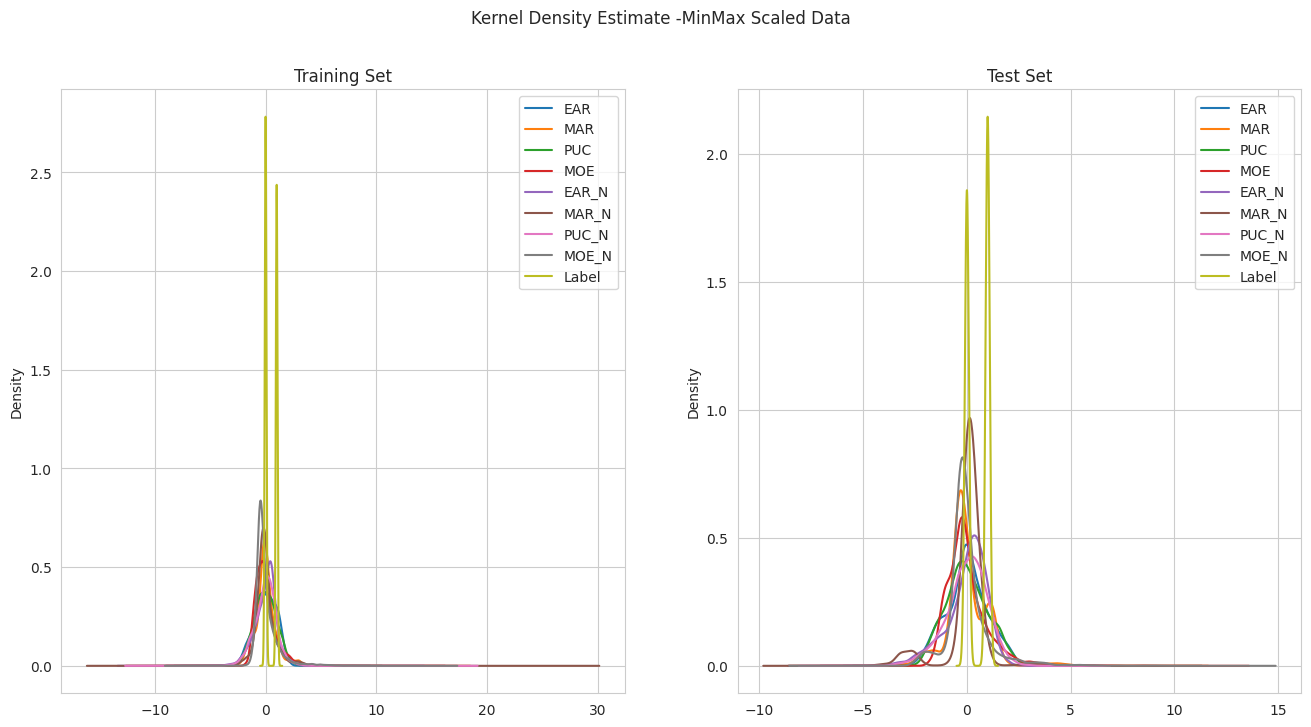

In [17]:
plot_kde(
    get_df(X_train_std, y_train),
    get_df(X_test_std, y_test),
    title='MinMax Scaled Data'
    )

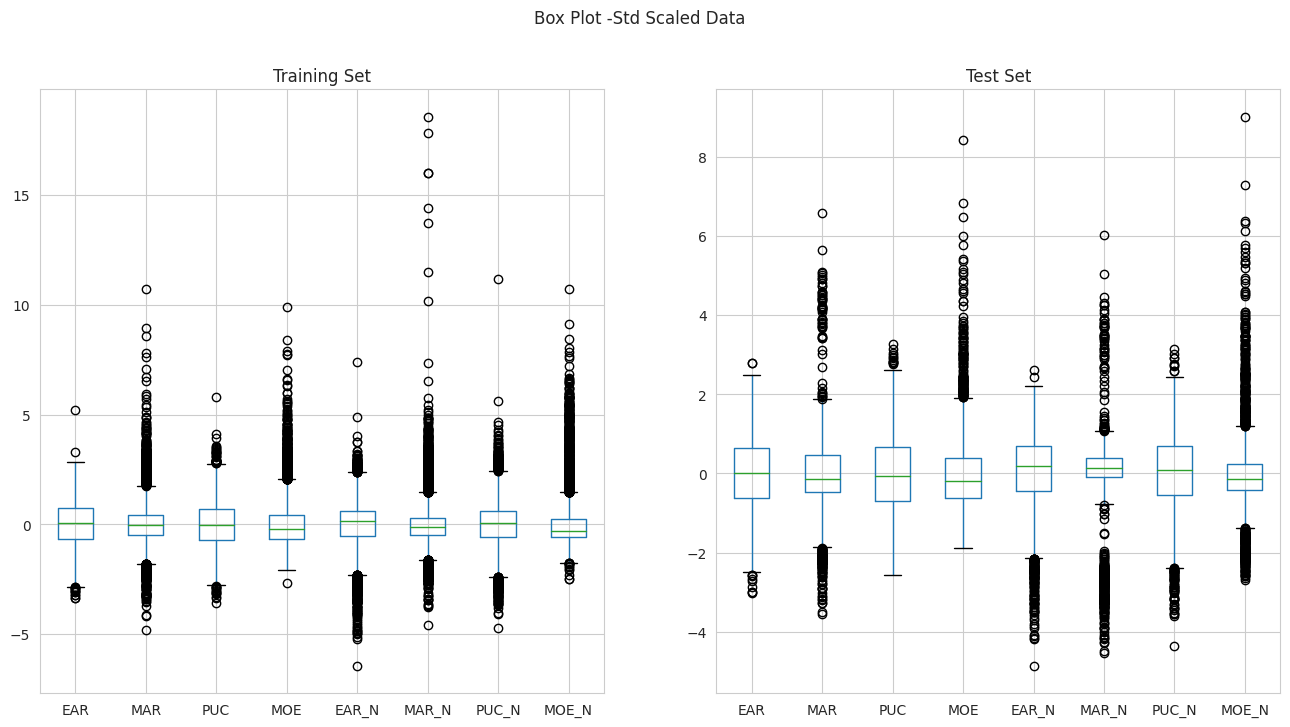

In [18]:
box_plot(
    get_df(X_train_std, y_train).drop(['Label'], axis=1),
    get_df(X_test_std, y_test).drop(['Label'], axis=1),
    title='Std Scaled Data'
)

In [19]:
DIR = '/content/drive/MyDrive/Drowsiness Detection/Processed_Features/'
get_df(X_train_std, y_train).to_csv(DIR + 'train_std_scaled.csv')
get_df(X_test_std, y_test).to_csv(DIR + 'test_std_scaled.csv')